In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
from textblob import TextBlob
import time

In [2]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

# Gensim
import gensim, spacy, logging, warnings
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

In [3]:
# File Path
fakenews_path = ("/Users/xingyucai/Desktop/Fact Check Dataset/FactCheckData_clean_mini.json")
redditcomment_path = ("/Users/xingyucai/Desktop/fake_news_reddit_cikm20.json")

# Fact Check Data
fakenews = pd.read_json(fakenews_path)
en_news = fakenews[fakenews['language']=='en'].reset_index(drop=True)

# Reddit Comments Data
reddit_data = pd.read_json(redditcomment_path)

df_1 = en_news.drop(columns=['author_type','url','rating_type','rating','dataFeedElement','language'])
#df = reddit_data.drop(columns=['label','reddit_comments','researched_by','url'])

In [4]:
len(df_1.text.values.tolist())

6817

In [5]:
# NLTK Stop words
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
#stop_words.extend(['from', 'subject', 're', 'edu', 'use', 'not', 'would', 'say', 'said', 'claim', 'http', 'could', '_', 'be', 'know', 'good', 'go', 'get', 'do', 'done', 'try', 'many', 'some', 'nice', 'thank', 'think', 'see', 'rather', 'easy', 'easily', 'lot', 'lack', 'make', 'want', 'seem', 'run', 'need', 'even', 'right', 'line', 'even', 'also', 'may', 'take', 'come','one','two','three','four','five','six','seven','eight','nine','ten', 'show','new','says','well','like','u','shows','things','another','still','however','since','going','through','much'])

%matplotlib inline
warnings.filterwarnings("ignore",category=DeprecationWarning)
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

In [6]:
def sent_to_words(sentences):
    for sent in sentences:
        sent = re.sub('\S*@\S*\s?', '', sent)  # remove emails
        sent = re.sub('\s+', ' ', sent)  # remove newline chars
        sent = re.sub("\'", "", sent)  # remove single quotes
        sent = gensim.utils.simple_preprocess(str(sent), deacc=True) 
        yield(sent)  

# Convert to list
data_1 = df_1.text.values.tolist()
data_words_1 = list(sent_to_words(data_1))

In [7]:
words_len_1 = [len(d) for d in data_words_1]

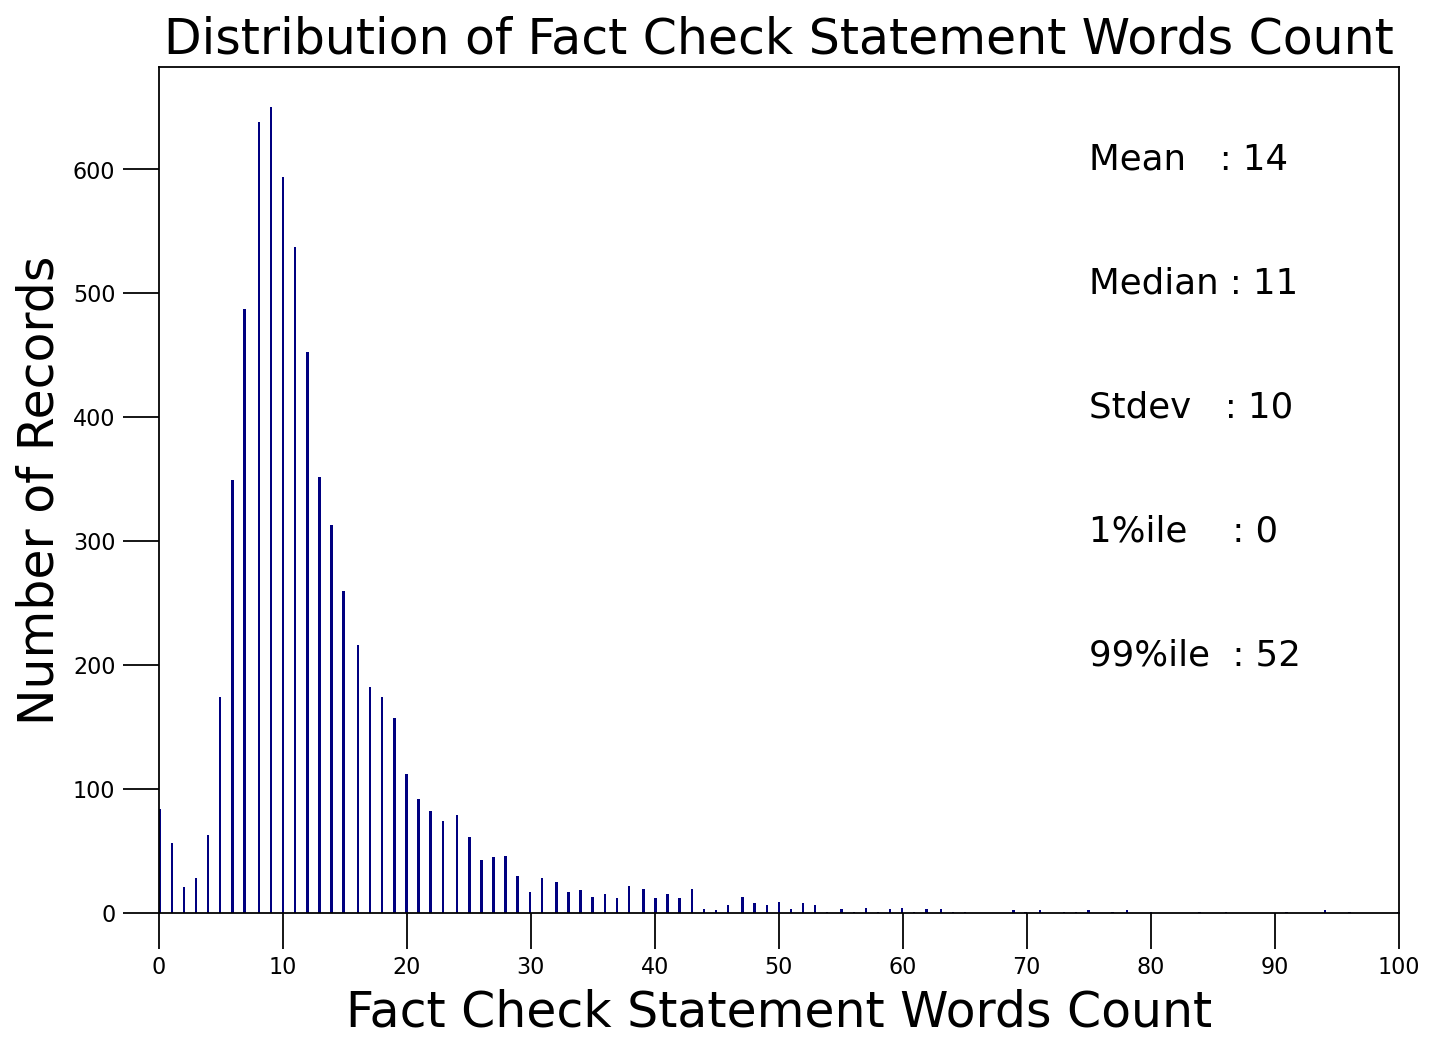

In [12]:
# Plot
plt.figure(figsize=(10,7), dpi=160)
plt.hist(words_len_1, bins = 1000, color='navy')
plt.text(75, 600, "Mean   : " + str(round(np.mean(words_len_1))), fontsize=16)
plt.text(75,  500, "Median : " + str(round(np.median(words_len_1))), fontsize=16)
plt.text(75,  400, "Stdev   : " + str(round(np.std(words_len_1))), fontsize=16)
plt.text(75,  300, "1%ile    : " + str(round(np.quantile(words_len_1, q=0.01))), fontsize=16)
plt.text(75,  200, "99%ile  : " + str(round(np.quantile(words_len_1, q=0.99))), fontsize=16)

plt.gca().set(xlim=(0, 100))
plt.tick_params(size=16)
plt.xticks(np.linspace(0,100,11))
plt.xlabel(xlabel='Fact Check Statement Words Count', fontsize=22)
plt.ylabel(ylabel='Number of Records', fontsize=22)
plt.title('Distribution of Fact Check Statement Words Count', fontdict=dict(size=22))
plt.show()

In [12]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

In [14]:
text_1 = ""
for i in df_1.text:
    text_1 = text_1 + i

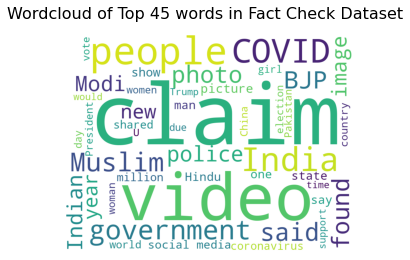

In [15]:
wordcloud_1 = WordCloud(stopwords=stop_words,
                      background_color="white",
                      width=1000,
                      height=750,
                      max_words=45,
                      margin=2).generate(text_1)
plt.imshow(wordcloud_1)
plt.axis("off")
plt.suptitle('Wordcloud of Top 45 words in Fact Check Dataset',size=16)
plt.show()

In [7]:
df = reddit_data.drop(columns=['label','reddit_comments','researched_by','url'])
len(df.text.values.tolist())

69396

In [8]:
data = df.text.values.tolist()
data_words = list(sent_to_words(data))
words_len = [len(d) for d in data_words]

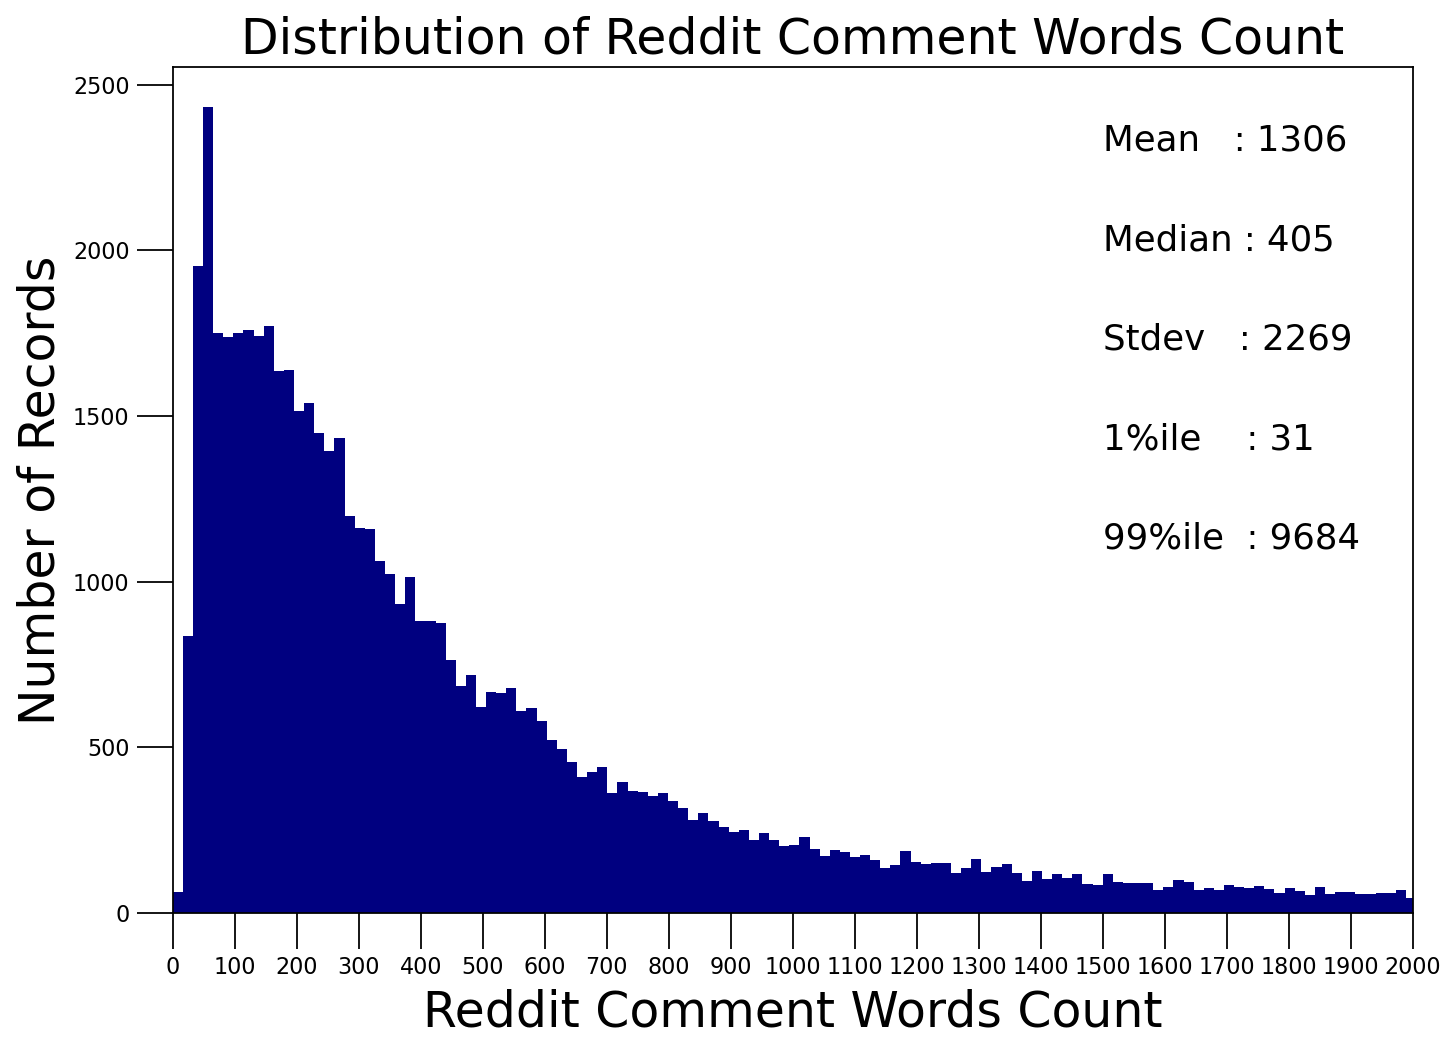

In [9]:
# Plot
plt.figure(figsize=(10,7), dpi=160)
plt.hist(words_len, bins = 1000, color='navy')
plt.text(1500, 2300, "Mean   : " + str(round(np.mean(words_len))),fontsize=16)
plt.text(1500, 2000, "Median : " + str(round(np.median(words_len))),fontsize=16)
plt.text(1500, 1700, "Stdev   : " + str(round(np.std(words_len))),fontsize=16)
plt.text(1500, 1400, "1%ile    : " + str(round(np.quantile(words_len, q=0.01))),fontsize=16)
plt.text(1500, 1100, "99%ile  : " + str(round(np.quantile(words_len, q=0.99))),fontsize=16)

plt.gca().set(xlim=(0, 2000))
plt.tick_params(size=16)
plt.xticks(np.linspace(0,2000,21))
plt.xlabel(xlabel='Reddit Comment Words Count', fontsize=22)
plt.ylabel(ylabel='Number of Records', fontsize=22)
plt.title('Distribution of Reddit Comment Words Count', fontdict=dict(size=22))
plt.show()

In [10]:
text = ""
for i in df.text:
    text = text + i

In [ ]:
wordcloud = WordCloud(stopwords=stop_words,
                      background_color="white",
                      width=1000,
                      height=750,
                      max_words=45,
                      margin=2).generate(text)
plt.imshow(wordcloud)
plt.suptitle('Wordcloud of Top 45 words in Reddit Comment Dataset',size=16)
plt.axis("off")
plt.show()